# Breast Cancer Wisconsin 

Reference : https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original) \
Second Ref : https://www.kaggle.com/uciml/breast-cancer-wisconsin-data \
Data Set Characteristics:Multivariate \
Associated Tasks:Classification \
Date Donated:1992-07-15 \
\
Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed from the data itself:

## <span style='background:#FE8F8F'>I. Data Loading</span>

In [1]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read Dataframe
df = pd.read_csv('breast-cancer-datasets.csv')
df.head(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [3]:
#Check Shape
df.shape

(569, 33)

In [4]:
#Check missing value
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
#Check the value type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
#Dropping id
df.drop('id', axis = 1, inplace = True)

In [7]:
#Dropping Unnamed
df.drop('Unnamed: 32', axis = 1, inplace = True)

###### Data Insight 
Attribute Information:
1) ID number \
2) Diagnosis (M = malignant, B = benign) \
3-32) \
\
Ten real-valued features are computed for each cell nucleus: \
a) radius (mean of distances from center to points on the perimeter) \
b) texture (standard deviation of gray-scale values) \
c) perimeter \
d) area \
e) smoothness (local variation in radius lengths) \
f) compactness (perimeter^2 / area - 1.0) \
g) concavity (severity of concave portions of the contour) \
h) concave points (number of concave portions of the contour) \
i) symmetry \
j) fractal dimension ("coastline approximation" - 1) \
\
The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.
All feature values are recoded with four significant digits.\
\
Missing attribute values: none
\
###### Target : Diagnosis 

In [8]:
pd.unique(df['diagnosis'])

array(['M', 'B'], dtype=object)

###### Data Transformation

In [9]:
#One Hot Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
df['diag'] = le.fit_transform(df['diagnosis'])

In [11]:
#Deleting Column
del df['diagnosis']

In [12]:
#Renaming Columng
df = df.rename({'diag': 'diagnosis'}, axis=1)

In [13]:
df

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  diagnosis  
0                  0.2654          0.4601                  0.11890          1  
1                  0.1860          0.2750                  0.08902          1  
2                  0.2430          0.3613                  0.08758          1  
3                  0.2575          0.6638                  0.17300          1  
4                  0.1625          0.2364        

## <span style='background:#FE8F8F'>II. Data Preprocessing</span>

## <span style='background:#FFEDD3'>1. Visualisasi</span>

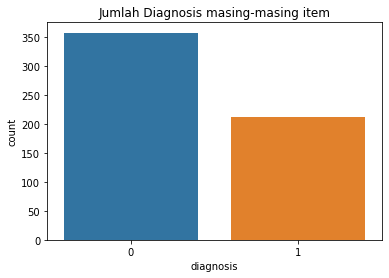

0    357
1    212
Name: diagnosis, dtype: int64

In [14]:
#Melihat Data Diagnosis
sns.countplot(data = df, x = 'diagnosis')
plt.title('Jumlah Diagnosis masing-masing item')
plt.show()

df['diagnosis'].value_counts()

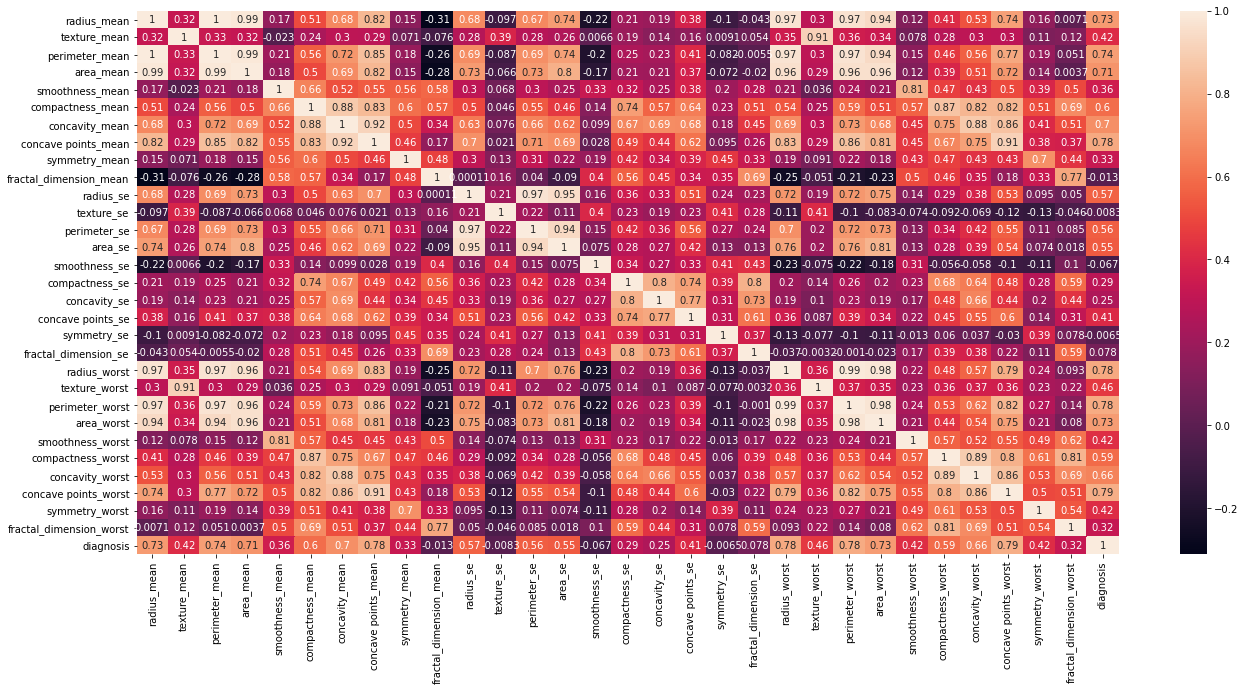

In [15]:
#Melihat korelasi antar feature dengan heatmap
plt.figure(figsize=(22,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

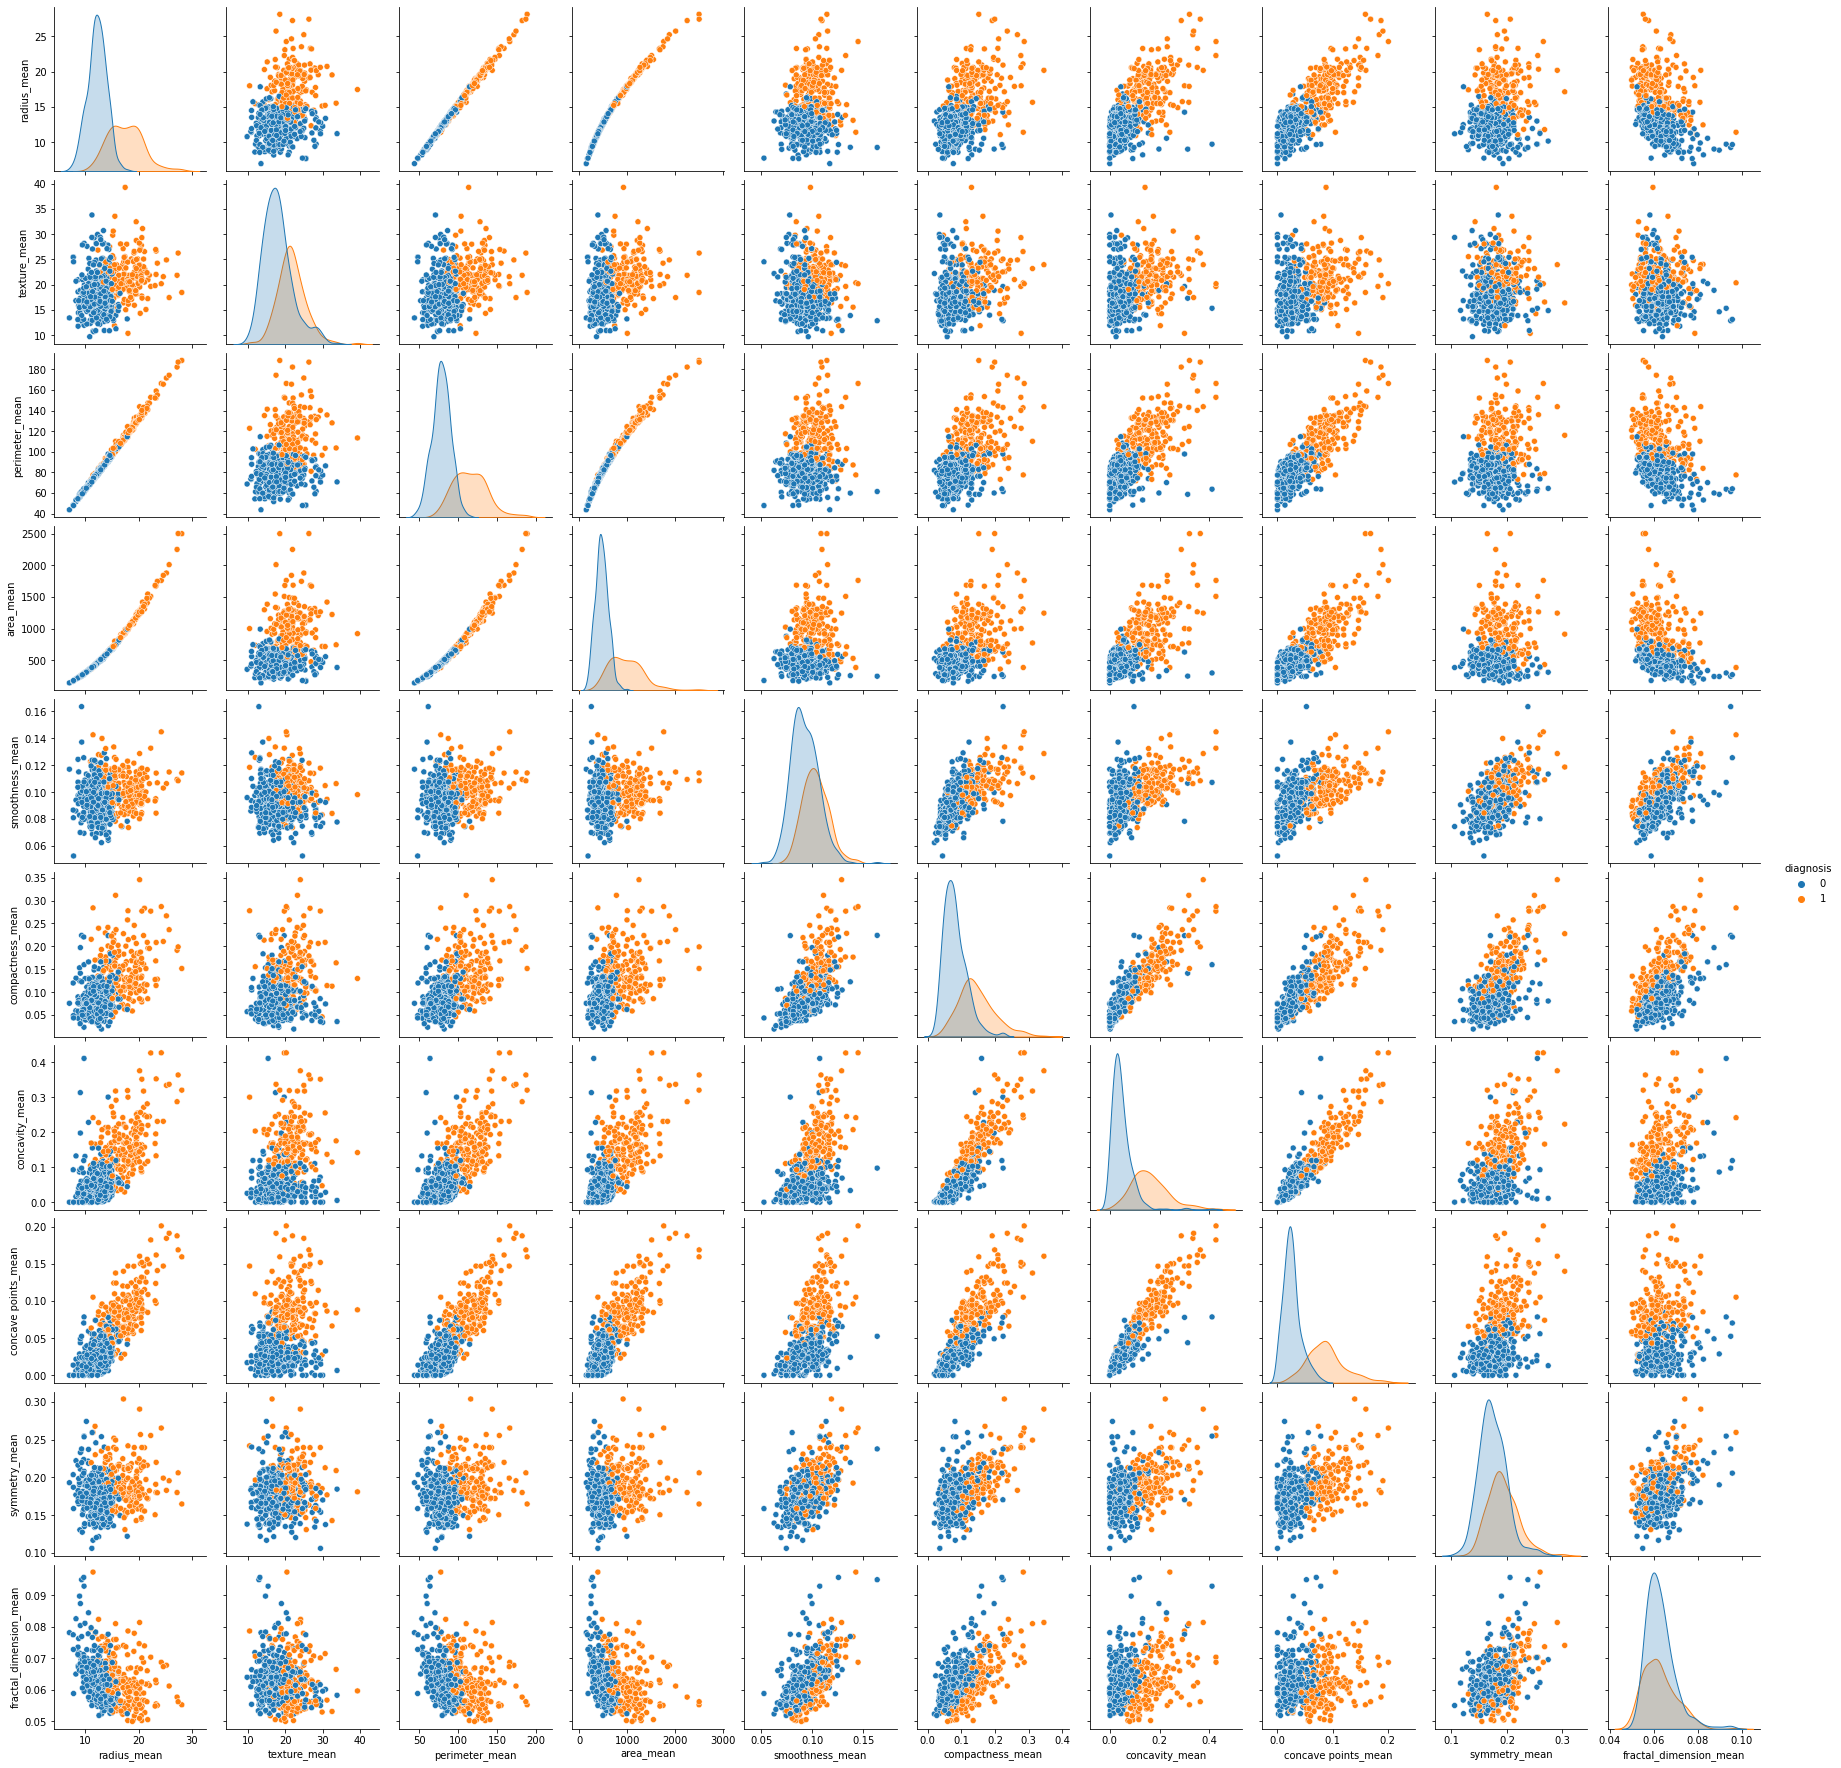

In [16]:
#Pairplot data diagnosis terhadap mean
data_mean = df[['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']].copy()
sns.pairplot(data_mean, hue="diagnosis")

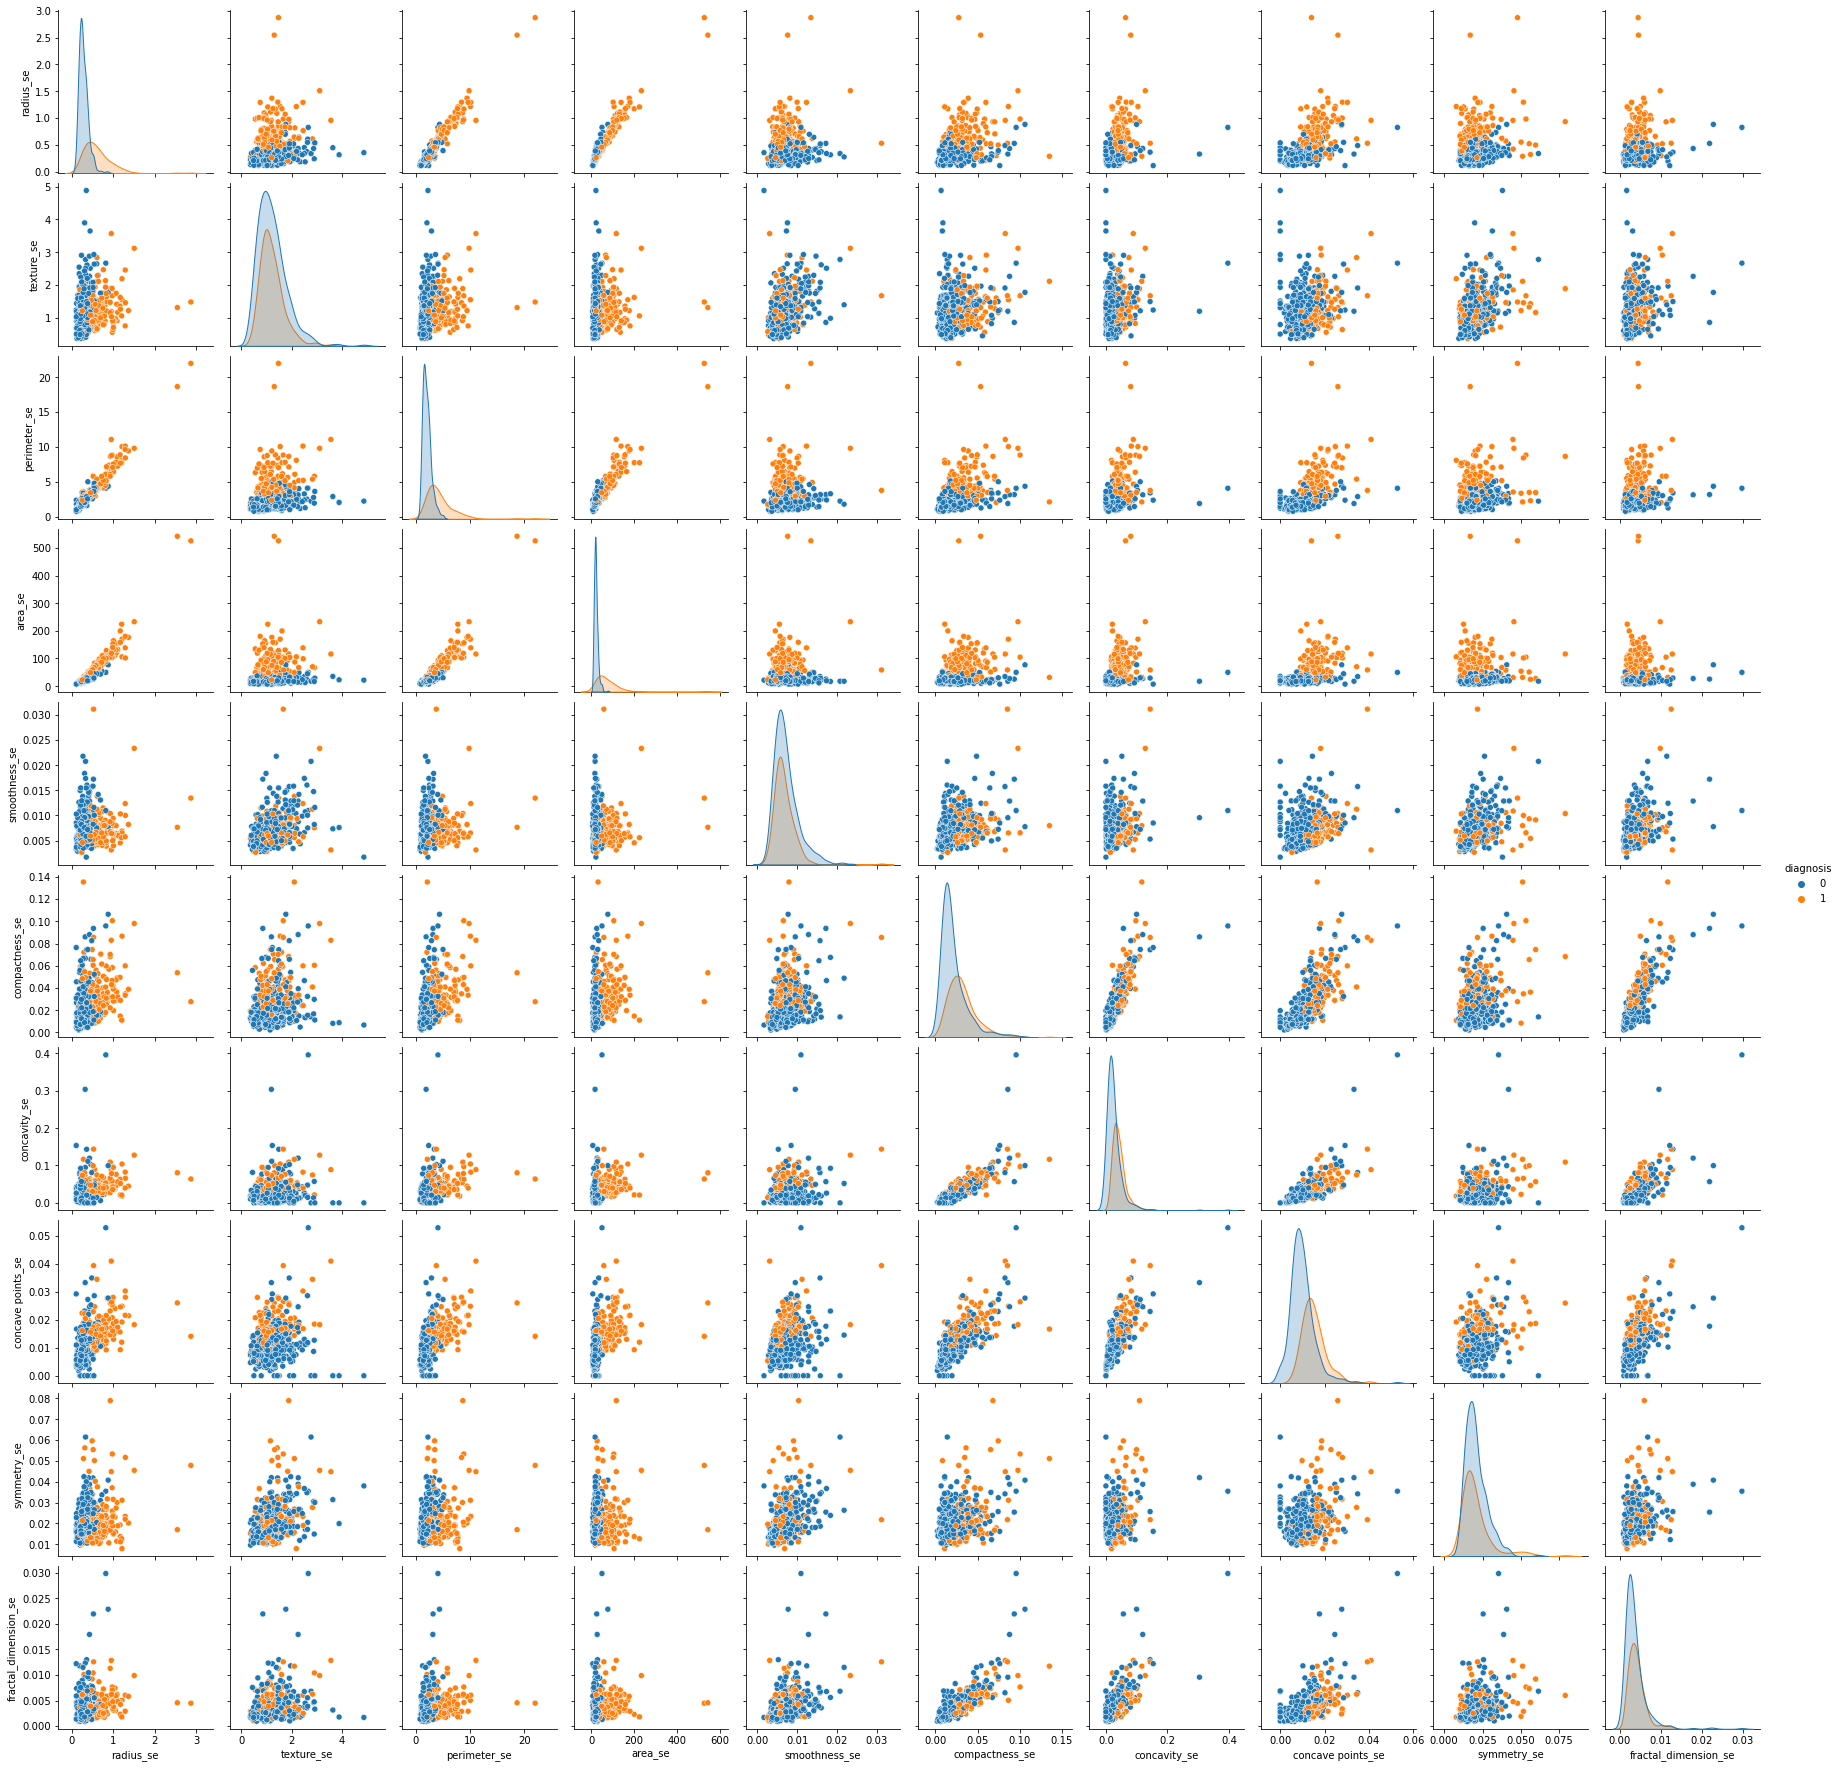

In [17]:
#Pairplot data diagnosis terhadap se
data_se = df[['diagnosis','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se',
              'concavity_se','concave points_se','symmetry_se','fractal_dimension_se']].copy()
sns.pairplot(data_se, hue="diagnosis")

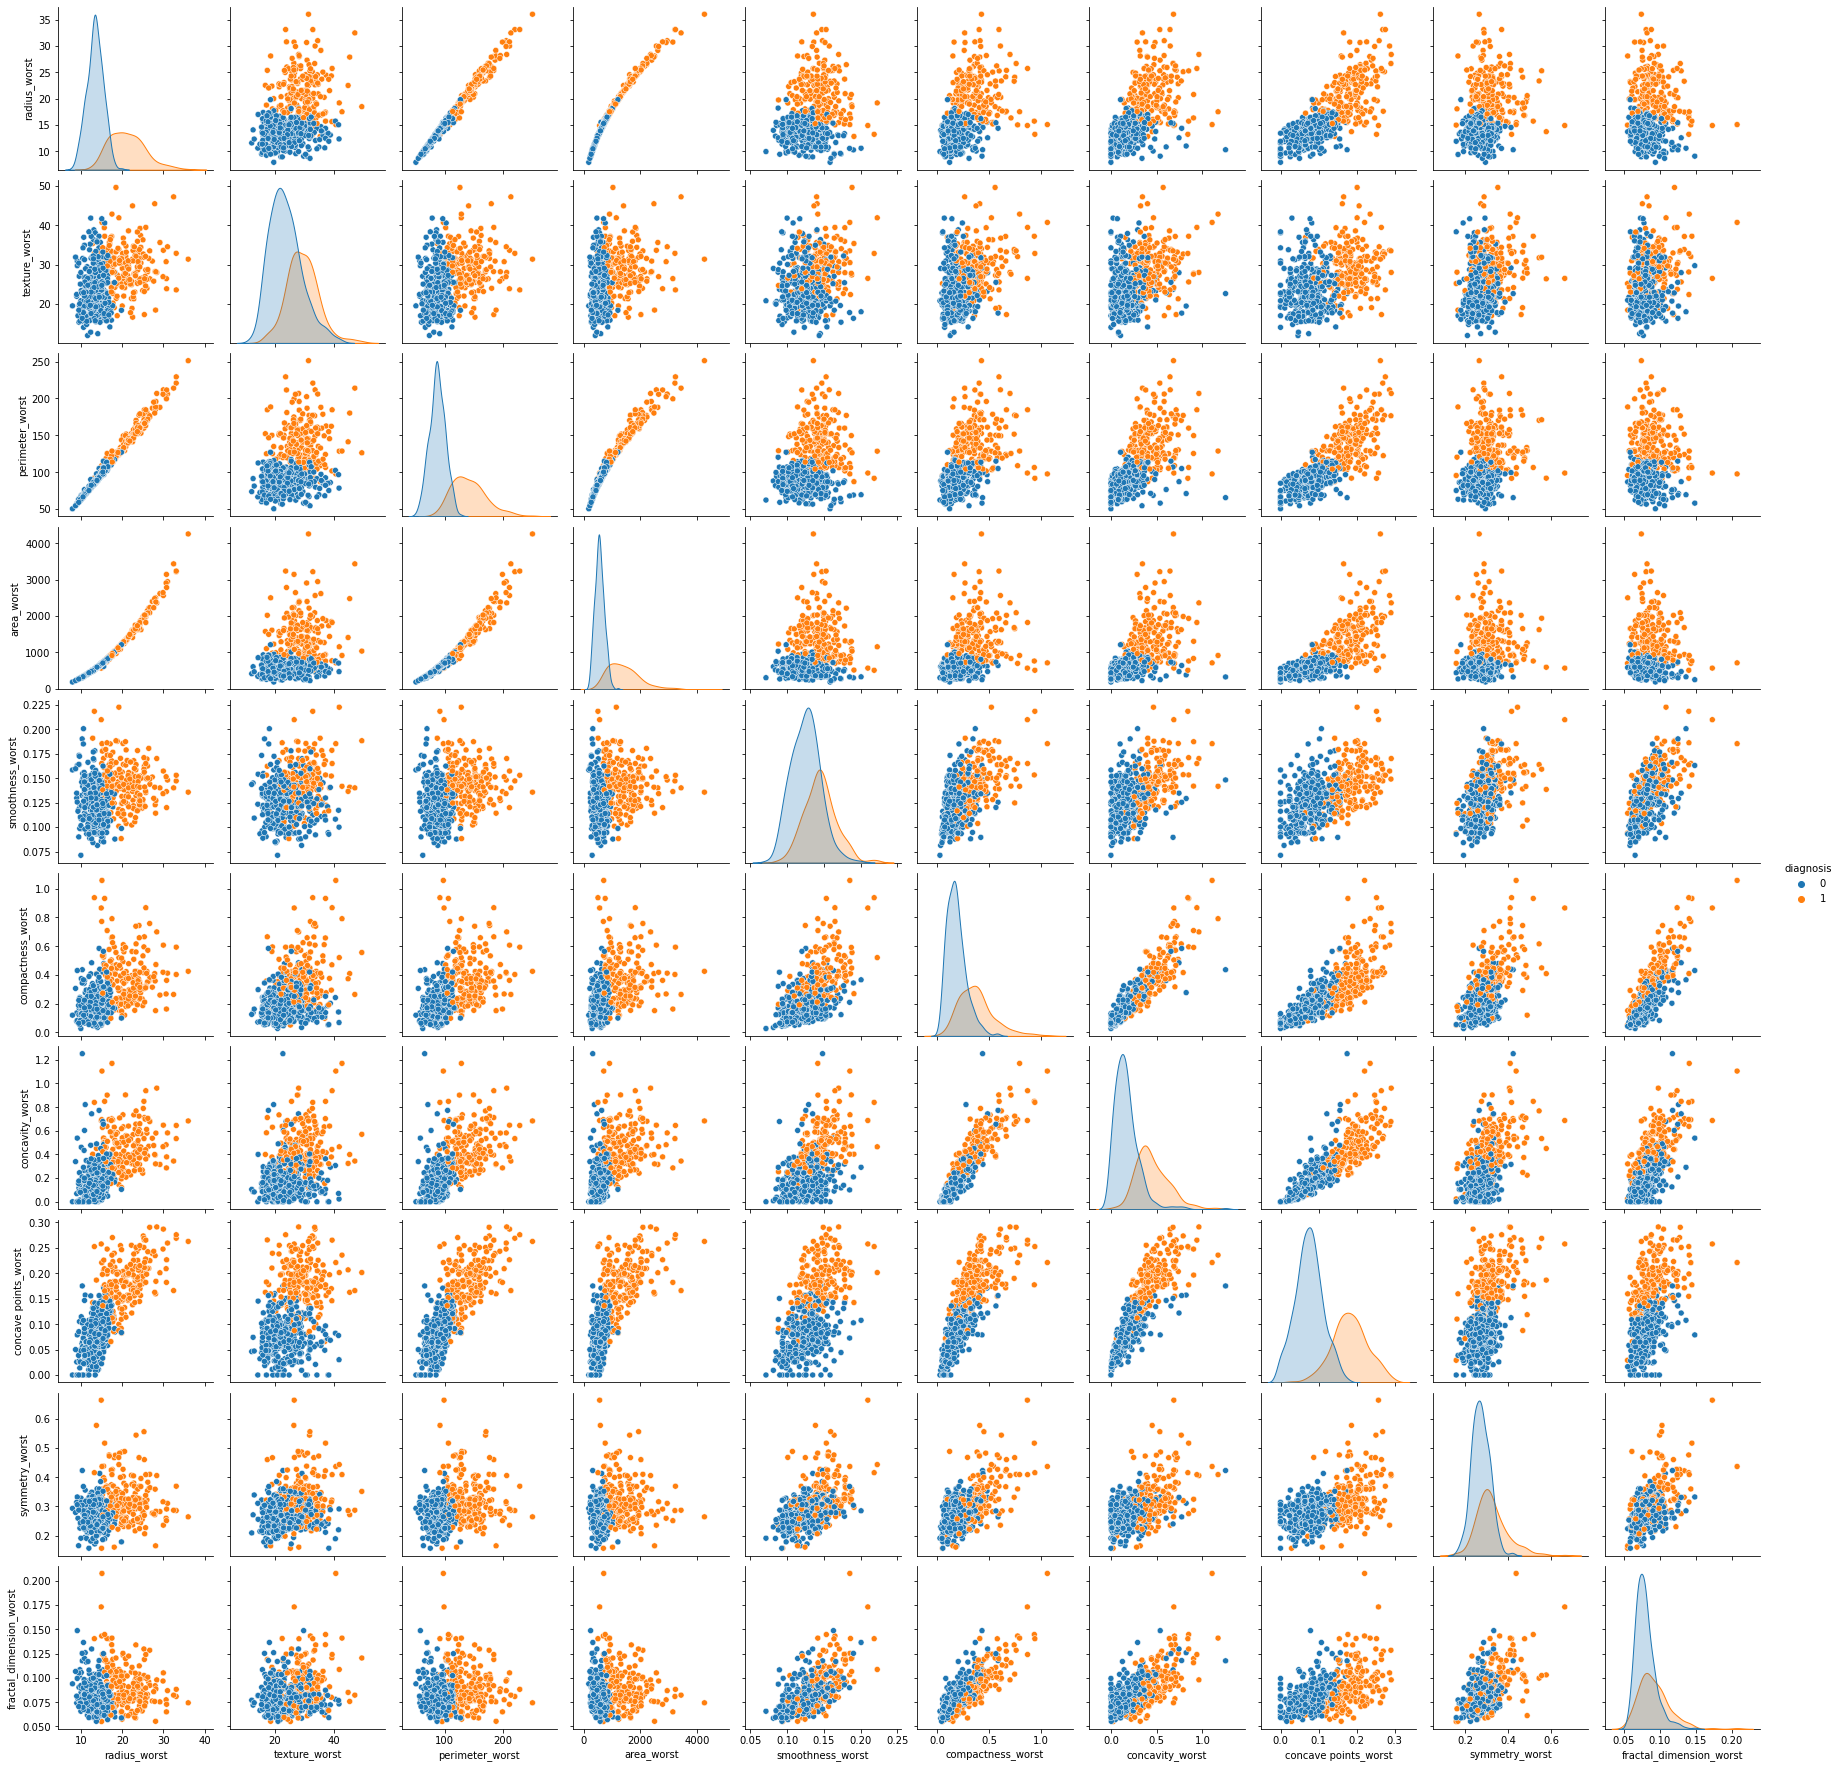

In [18]:
#Pairplot data diagnosis terhadap worst
data_worst = df[['diagnosis','radius_worst','texture_worst','perimeter_worst','area_worst',
                'smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst',
                'fractal_dimension_worst']].copy()
sns.pairplot(data_worst, hue="diagnosis")

## <span style='background:#FFEDD3'>2. Drop Column</span>

In [19]:
#Tidak drop column apapun, asumsi pemrogram data masih terlihat baik

## <span style='background:#FFEDD3'>3. Outliers</span>

In [20]:
#Copy Data untuk cek outlier
otl_check = df[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
                'concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se',
                'texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se',
                'symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst',
                'smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst',
                'fractal_dimension_worst']].copy()
otl_check.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

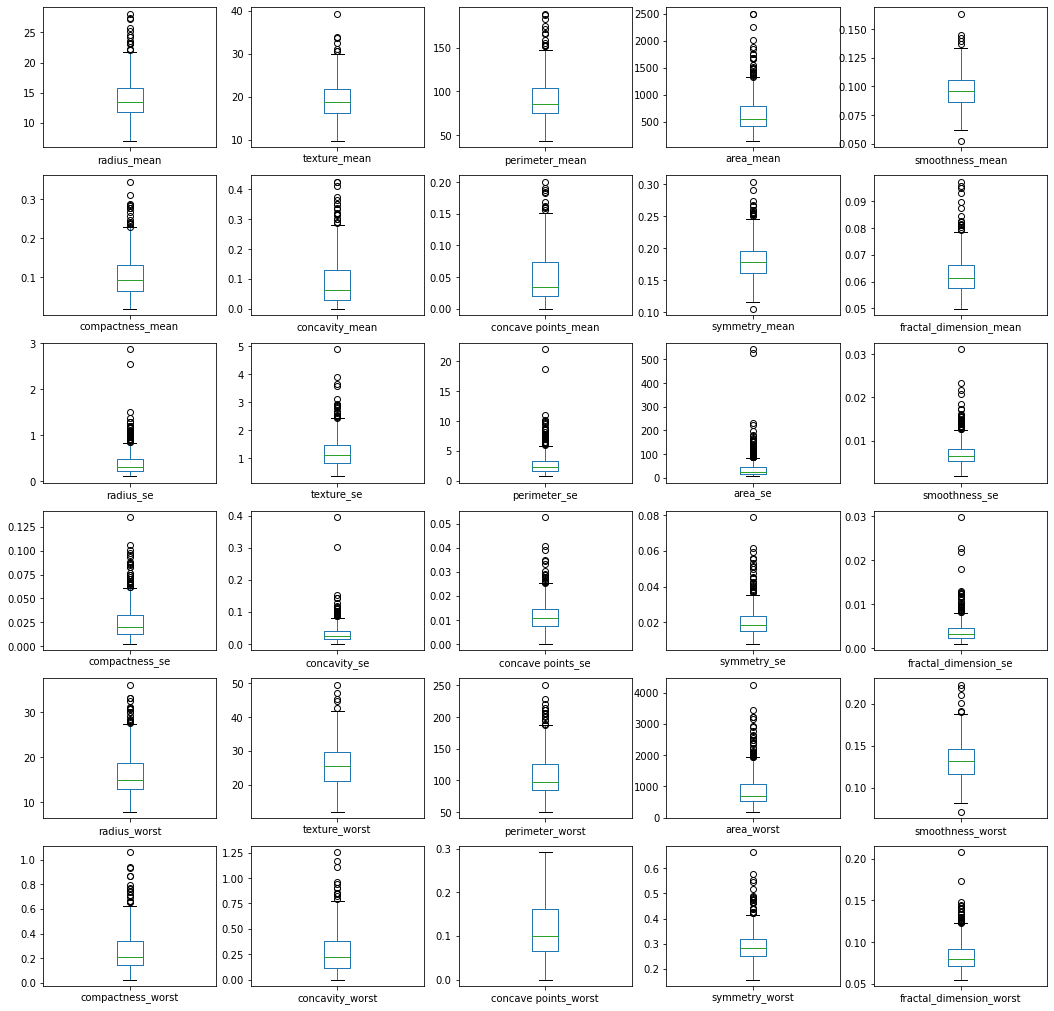

In [21]:
#Seeing Outlier
otl_check.plot(kind='box', subplots = True, layout = (6,5), figsize = (18,18))
plt.show()

#### a. Metode Z-Score :

In [22]:
#Import Library
from scipy.stats import zscore
cancer_zsc = df
cancer_z = cancer_zsc[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
                      'concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se',
                      'texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se',
                      'symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst',
                      'smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst',
                      'fractal_dimension_worst']].apply(zscore)

#Ignore diagnosis Applied z-score
cancer_z_add=cancer_zsc['diagnosis']
cancer_z = pd.concat([cancer_z, cancer_z_add], axis=1)

In [23]:
#Creating Function untuk pemrosesan
listRow = []
for column in cancer_z:
    i = 0
    for row in cancer_z[column]:
        if row > 3 or row < -3:
            listRow.append(i)
        i+=1

In [24]:
#Finding outlier dan masukan dalam list
def removeDuplicate(x):
  return list(dict.fromkeys(x))

listNew = removeDuplicate(listRow)
print(listNew)

[82, 180, 212, 352, 461, 219, 232, 239, 259, 122, 521, 339, 3, 105, 504, 568, 0, 78, 108, 181, 258, 567, 152, 202, 25, 60, 146, 71, 318, 376, 505, 138, 417, 503, 12, 83, 192, 416, 473, 557, 559, 561, 265, 368, 116, 213, 314, 345, 42, 68, 176, 190, 288, 290, 112, 389, 119, 351, 151, 388, 236, 23, 203, 379, 9, 14, 72, 562, 400, 430, 31, 35, 323, 370]


In [25]:
#Drop Outliers
cancer_z.drop(cancer_z.index[listNew], inplace=True)

In [26]:
#Lihat sisa data
cancer_z.shape

(495, 31)

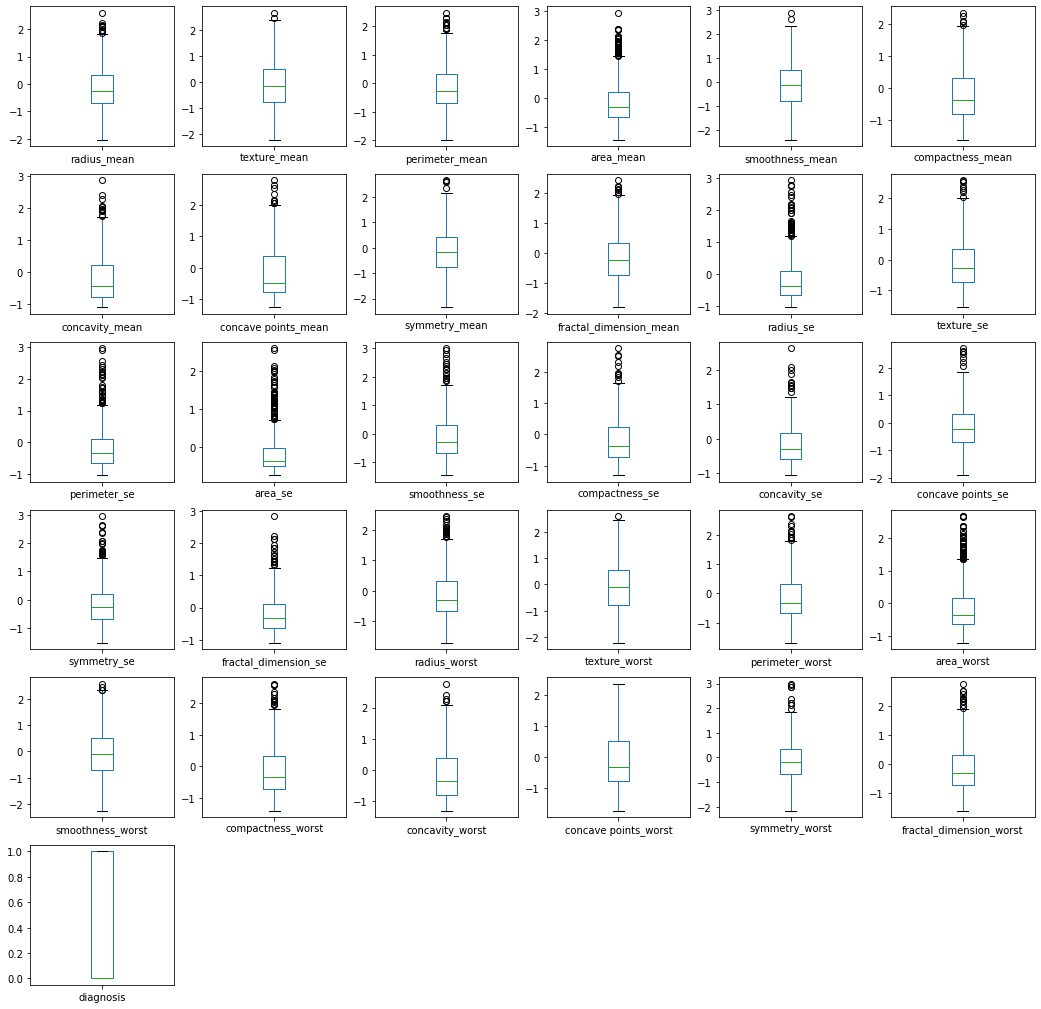

In [27]:
#Boxplot after outlier habdling
cancer_z.plot(kind='box', subplots = True, layout = (6,6), figsize = (18,18))
plt.show()

#### b. IQR :

In [28]:
# Metode IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

radius_mean                  4.080000
texture_mean                 5.630000
perimeter_mean              28.930000
area_mean                  362.400000
smoothness_mean              0.018930
compactness_mean             0.065480
concavity_mean               0.101140
concave points_mean          0.053690
symmetry_mean                0.033800
fractal_dimension_mean       0.008420
radius_se                    0.246500
texture_se                   0.640100
perimeter_se                 1.751000
area_se                     27.340000
smoothness_se                0.002977
compactness_se               0.019370
concavity_se                 0.026960
concave points_se            0.007072
symmetry_se                  0.008320
fractal_dimension_se         0.002310
radius_worst                 5.780000
texture_worst                8.640000
perimeter_worst             41.290000
area_worst                 568.700000
smoothness_worst             0.029400
compactness_worst            0.191900
concavity_wo

In [32]:
cancer_q = df[~((df <(Q1-1.5*IQR))|(df >(Q3 + 1.5*IQR))).any(axis=1)]

cancer_q.shape

(398, 31)

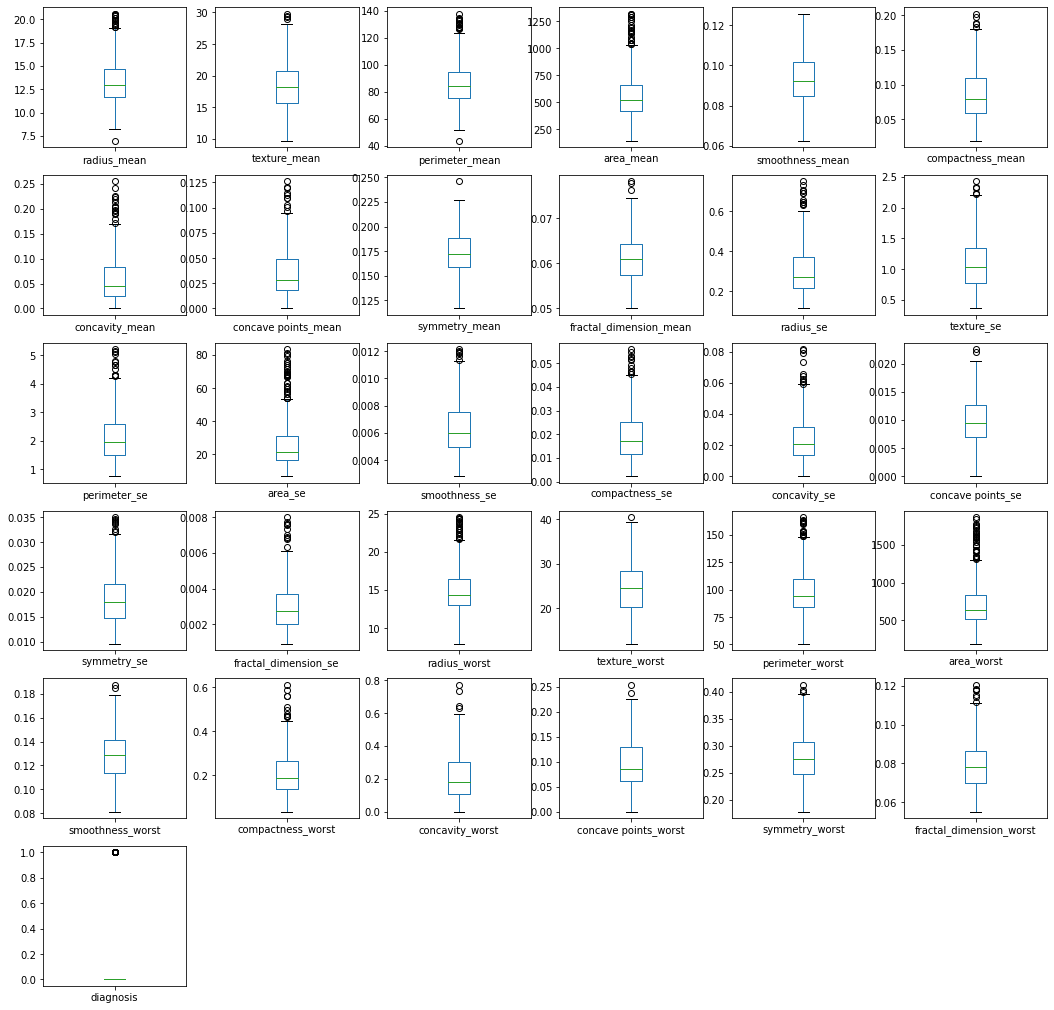

In [35]:
cancer_q.plot(kind='box', subplots = True, layout = (6,6), figsize = (18,18))
plt.show()

## <span style='background:#FFEDD3'>4. Normalisasi Data</span>

Semua proses normalisasi menggunakan metode yang sama

In [36]:
#Pilihan yang akan di normalisasi
labelNorm = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
             'concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se',
             'texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se',
             'symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst',
             'smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst',
             'fractal_dimension_worst']

In [37]:
# Using Robust Scaling
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

In [38]:
#Fungsi Normalisasi Robust Scaling
def cancerRobust(dtframe,label):
    dtframe[label] = rs.fit_transform(dtframe[[label]])

#### Normalisasi data default

In [39]:
#Copy dataframe
cancer_df = df

In [40]:
#Proses Normalisasi
for column in labelNorm:
    cancerRobust(cancer_df,column)

#### Normalisasi data Z-Score

In [41]:
#Copy dataframe
cancer_zs = cancer_z

In [42]:
#Proses Normalisasi
for column in labelNorm:
    cancerRobust(cancer_zs,column)

#### Normalisasi data IQR

In [43]:
#Copy dataframe
cancer_iq = cancer_q.copy()

In [44]:
#Proses Normalisasi
for column in labelNorm:
    cancerRobust(cancer_iq,column)

## <span style='background:#FE8F8F'>III. Modelling</span>

In [45]:
dfModelling = [cancer_df, cancer_zs, cancer_iq]

In [46]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

#### <span style='background:#A9E4D7'>I. Logistic Regresion</span>

In [47]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [55]:
#Buat function untuk otomatisasi training & testing
LRG_list = ['LogisticRegression']
def modelTrainTestLRG(dfcancer):
    #Membagi size antara data training dan data test 8:2
    train_data, test_data = train_test_split(dfcancer, test_size = 0.2, random_state = 10)
    
    #Pemilihan Feature & Target untuk Train Data
    train_feature = train_data.drop(['diagnosis'], axis = 1)
    train_target = train_data['diagnosis']
    #Pemilihan Feature & Target untuk Test Data
    test_feature = test_data.drop(['diagnosis'], axis = 1)
    test_target = test_data['diagnosis']
    
    #Training dengan Logistic Regression
    logreg.fit(train_feature, train_target)
    valTrain = logreg.score(train_feature, train_target)
    
    #Predict Test Data
    y_predict = logreg.predict(test_feature)
    valTest = logreg.score(test_feature, test_target)
    
    #Cetak Evaluasi
    print('Training : ',valTrain*100)
    print('Testing : ',valTest*100)
    print('Acc:',classification_report(test_target,y_predict))
    LRG_list.append(valTrain*100)
    LRG_list.append(valTest*100)
    
    #F1Score
    f1scr = f1_score(test_target, y_predict, average = "macro")
    LRG_list.append(f1scr)    

In [56]:
#Proses Training & Eval
print('----Flat Dataframe-----')
modelTrainTestLRG(cancer_df)
print('----Zscore-----')
modelTrainTestLRG(cancer_zs)
print('----IQR-----')
modelTrainTestLRG(cancer_iq)

----Flat Dataframe-----
Training :  98.68131868131869
Testing :  96.49122807017544
Acc:               precision    recall  f1-score   support

           0       0.97      0.97      0.97        75
           1       0.95      0.95      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

----Zscore-----
Training :  98.98989898989899
Testing :  98.98989898989899
Acc:               precision    recall  f1-score   support

           0       0.98      1.00      0.99        65
           1       1.00      0.97      0.99        34

    accuracy                           0.99        99
   macro avg       0.99      0.99      0.99        99
weighted avg       0.99      0.99      0.99        99

----IQR-----
Training :  97.79874213836479
Testing :  98.75
Acc:               precision    recall  f1-score   support

           0       1.00      0.98      0.99        64
    

#### <span style='background:#A9E4D7'>II. SVC</span>

In [57]:
from sklearn.svm import SVC
svc = SVC()

In [58]:
#Buat function untuk otomatisasi training & testing
SVC_list = ['SVC']
def modelTrainTestSV(dfcancer):
    #Membagi size antara data training dan data test 8:2
    train_data, test_data = train_test_split(dfcancer, test_size = 0.2, random_state = 10)
    
    #Pemilihan Feature & Target untuk Train Data
    train_feature = train_data.drop(['diagnosis'], axis = 1)
    train_target = train_data['diagnosis']
    #Pemilihan Feature & Target untuk Test Data
    test_feature = test_data.drop(['diagnosis'], axis = 1)
    test_target = test_data['diagnosis']
    
    #Training dengan SVC
    svc.fit(train_feature, train_target)
    valTrain = svc.score(train_feature, train_target)
    
    #Predict Test Data
    y_predict = svc.predict(test_feature)
    valTest = svc.score(test_feature, test_target)
    
    #Cetak Evaluasi
    print('Training : ',valTrain*100)
    print('Testing : ',valTest*100)
    print('Acc:',classification_report(test_target,y_predict))
    SVC_list.append(valTrain*100)
    SVC_list.append(valTest*100)    
    
    #F1Score
    f1scr = f1_score(test_target, y_predict, average = "macro")
    SVC_list.append(f1scr)    

In [59]:
#Proses Training & Eval
print('----Flat Dataframe-----')
modelTrainTestSV(cancer_df)
print('----Zscore-----')
modelTrainTestSV(cancer_zs)
print('----IQR-----')
modelTrainTestSV(cancer_iq)

----Flat Dataframe-----
Training :  98.68131868131869
Testing :  97.36842105263158
Acc:               precision    recall  f1-score   support

           0       1.00      0.96      0.98        75
           1       0.93      1.00      0.96        39

    accuracy                           0.97       114
   macro avg       0.96      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114

----Zscore-----
Training :  98.48484848484848
Testing :  98.98989898989899
Acc:               precision    recall  f1-score   support

           0       0.98      1.00      0.99        65
           1       1.00      0.97      0.99        34

    accuracy                           0.99        99
   macro avg       0.99      0.99      0.99        99
weighted avg       0.99      0.99      0.99        99

----IQR-----
Training :  98.11320754716981
Testing :  96.25
Acc:               precision    recall  f1-score   support

           0       1.00      0.95      0.98        64
    

#### <span style='background:#A9E4D7'>III. Random Forest</span>

In [60]:
from sklearn.ensemble import RandomForestClassifier
rdmFC = RandomForestClassifier()

In [61]:
#Buat function untuk otomatisasi training & testing
RCF_list = ['RandomForestClassifier']
def modelTrainTestRFC(dfcancer):
    #Membagi size antara data training dan data test 8:2
    train_data, test_data = train_test_split(dfcancer, test_size = 0.2, random_state = 10)
    
    #Pemilihan Feature & Target untuk Train Data
    train_feature = train_data.drop(['diagnosis'], axis = 1)
    train_target = train_data['diagnosis']
    #Pemilihan Feature & Target untuk Test Data
    test_feature = test_data.drop(['diagnosis'], axis = 1)
    test_target = test_data['diagnosis']
    
    #Training dengan Random Forest
    rdmFC.fit(train_feature, train_target)
    valTrain = rdmFC.score(train_feature, train_target)
    
    #Predict Test Data
    y_predict = rdmFC.predict(test_feature)
    valTest = rdmFC.score(test_feature, test_target)
    
    #Cetak Evaluasi
    print('Training : ',valTrain*100)
    print('Testing : ',valTest*100)
    print('Acc:',classification_report(test_target,y_predict))
    RCF_list.append(valTrain*100)
    RCF_list.append(valTest*100)    
    
    #F1Score
    f1scr = f1_score(test_target, y_predict, average = "macro")
    RCF_list.append(f1scr)    

In [62]:
#Proses Training & Eval
print('----Flat Dataframe-----')
modelTrainTestRFC(cancer_df)
print('----Zscore-----')
modelTrainTestRFC(cancer_zs)
print('----IQR-----')
modelTrainTestRFC(cancer_iq)

----Flat Dataframe-----
Training :  100.0
Testing :  98.24561403508771
Acc:               precision    recall  f1-score   support

           0       1.00      0.97      0.99        75
           1       0.95      1.00      0.97        39

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114

----Zscore-----
Training :  100.0
Testing :  96.96969696969697
Acc:               precision    recall  f1-score   support

           0       0.96      1.00      0.98        65
           1       1.00      0.91      0.95        34

    accuracy                           0.97        99
   macro avg       0.98      0.96      0.97        99
weighted avg       0.97      0.97      0.97        99

----IQR-----
Training :  100.0
Testing :  96.25
Acc:               precision    recall  f1-score   support

           0       1.00      0.95      0.98        64
           1       0.84      1.00      0

#### <span style='background:#A9E4D7'>IV. k-nearest Neighbor</span>

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knnC = KNeighborsClassifier()

In [64]:
#Buat function untuk otomatisasi training & testing
KNC_list = ['KNeighborsClassifier']
def modelTrainTestKNC(dfcancer):
    #Membagi size antara data training dan data test 8:2
    train_data, test_data = train_test_split(dfcancer, test_size = 0.2, random_state = 10)
    
    #Pemilihan Feature & Target untuk Train Data
    train_feature = train_data.drop(['diagnosis'], axis = 1)
    train_target = train_data['diagnosis']
    #Pemilihan Feature & Target untuk Test Data
    test_feature = test_data.drop(['diagnosis'], axis = 1)
    test_target = test_data['diagnosis']
    
    #Training dengan k-Nearest
    knnC.fit(train_feature, train_target)
    valTrain = knnC.score(train_feature, train_target)
    
    #Predict Test Data
    y_predict = knnC.predict(test_feature)
    valTest = knnC.score(test_feature, test_target)
    
    #Cetak Evaluasi
    print('Training : ',valTrain*100)
    print('Testing : ',valTest*100)
    print('Acc:',classification_report(test_target,y_predict))
    KNC_list.append(valTrain*100)
    KNC_list.append(valTest*100)  
    
    #F1Score
    f1scr = f1_score(test_target, y_predict, average = "macro")
    KNC_list.append(f1scr)    

In [65]:
#Proses Training & Eval
print('----Flat Dataframe-----')
modelTrainTestKNC(cancer_df)
print('----Zscore-----')
modelTrainTestKNC(cancer_zs)
print('----IQR-----')
modelTrainTestKNC(cancer_iq)

----Flat Dataframe-----
Training :  96.92307692307692
Testing :  98.24561403508771
Acc:               precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.95      0.97        39

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114

----Zscore-----
Training :  96.21212121212122
Testing :  95.95959595959596
Acc:               precision    recall  f1-score   support

           0       0.97      0.97      0.97        65
           1       0.94      0.94      0.94        34

    accuracy                           0.96        99
   macro avg       0.96      0.96      0.96        99
weighted avg       0.96      0.96      0.96        99

----IQR-----
Training :  96.85534591194968
Testing :  97.5
Acc:               precision    recall  f1-score   support

           0       1.00      0.97      0.98        64
     

#### <span style='background:#A9E4D7'>V. Naive Bayes</span>

In [66]:
from sklearn.naive_bayes import GaussianNB
nbyc = GaussianNB()

In [72]:
#Buat function untuk otomatisasi training & testing
NBY_list = ['naive_bayes']
def modelTrainTestNVB(dfcancer):
    #Membagi size antara data training dan data test 8:2
    train_data, test_data = train_test_split(dfcancer, test_size = 0.2, random_state = 10)
    
    #Pemilihan Feature & Target untuk Train Data
    train_feature = train_data.drop(['diagnosis'], axis = 1)
    train_target = train_data['diagnosis']
    #Pemilihan Feature & Target untuk Test Data
    test_feature = test_data.drop(['diagnosis'], axis = 1)
    test_target = test_data['diagnosis']
    
    #Training dengan Naive Bayes
    nbyc.fit(train_feature, train_target)
    valTrain = nbyc.score(train_feature, train_target)
    
    #Predict Test Data
    y_predict = nbyc.predict(test_feature)
    valTest = nbyc.score(test_feature, test_target)
      
    #Cetak Evaluasi
    print('Training : ',valTrain*100)
    print('Testing : ',valTest*100)
    print('Acc:',classification_report(test_target,y_predict))
    NBY_list.append(valTrain*100)
    NBY_list.append(valTest*100)     
    
    #F1Score
    f1scr = f1_score(test_target, y_predict, average = "macro")
    NBY_list.append(f1scr)

In [73]:
#Proses Training & Eval
print('----Flat Dataframe-----')
modelTrainTestNVB(cancer_df)
print('----Zscore-----')
modelTrainTestNVB(cancer_zs)
print('----IQR-----')
modelTrainTestNVB(cancer_iq)

----Flat Dataframe-----
Training :  92.74725274725274
Testing :  95.6140350877193
Acc:               precision    recall  f1-score   support

           0       0.99      0.95      0.97        75
           1       0.90      0.97      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

----Zscore-----
Training :  93.68686868686868
Testing :  94.94949494949495
Acc:               precision    recall  f1-score   support

           0       0.94      0.98      0.96        65
           1       0.97      0.88      0.92        34

    accuracy                           0.95        99
   macro avg       0.95      0.93      0.94        99
weighted avg       0.95      0.95      0.95        99

----IQR-----
Training :  92.76729559748428
Testing :  97.5
Acc:               precision    recall  f1-score   support

           0       1.00      0.97      0.98        64
      

In [74]:
list_model_test = [LRG_list, SVC_list, RCF_list, KNC_list, NBY_list]

In [75]:
mdl_df = pd.DataFrame(columns = ['Algorithm', 'Flat_Train', 'Flat_Test', 'Flat_F1', 'Zscore_Train', 'Zscore_Train', 'Zscore_F1',
                                 'IQR_Train', 'IQR_Train', 'IQR_F1',]) 

In [76]:
#Append all list to dataframe
for model_apnd in list_model_test :
    mdl_df.loc[len(mdl_df)] = model_apnd

In [77]:
mdl_df

Algorithm  Flat_Train  Flat_Test   Flat_F1  Zscore_Train  \
0      LogisticRegression   98.681319  96.491228  0.961026     98.989899   
1                     SVC   98.681319  97.368421  0.971277     98.484848   
2  RandomForestClassifier  100.000000  98.245614  0.980743    100.000000   
3    KNeighborsClassifier   96.923077  98.245614  0.980263     96.212121   
4             naive_bayes   92.747253  95.614035  0.952129     93.686869   

   Zscore_Train  Zscore_F1   IQR_Train  IQR_Train    IQR_F1  
0     98.989899   0.988721   97.798742      98.75  0.980911  
1     98.989899   0.988721   98.113208      96.25  0.945143  
2     96.969697   0.965645  100.000000      96.25  0.945143  
3     95.959596   0.955204   96.855346      97.50  0.962652  
4     94.949495   0.942741   92.767296      97.50  0.962652